In [1]:
#Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
#Import the data file
HouseTrain = pd.read_csv(r'C:\Users\XXX\Downloads\home-data-for-ml-course\HomeTrain.csv')

In [5]:
#Quick view of data summary information
HouseTrain.info()
#HouseTrain[HouseTrain.isnull()==True]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [6]:
#Confirm the count of null values in a given column
HouseTrain['Alley'].isna().count()

1460

In [8]:
#Check the significance of all the independent variables against the dependent variables
HouseTrain.corr()['SalePrice'].sort_values()

KitchenAbvGr    -0.135907
EnclosedPorch   -0.128578
MSSubClass      -0.084284
OverallCond     -0.077856
YrSold          -0.028923
LowQualFinSF    -0.025606
Id              -0.021917
MiscVal         -0.021190
BsmtHalfBath    -0.016844
BsmtFinSF2      -0.011378
3SsnPorch        0.044584
MoSold           0.046432
PoolArea         0.092404
ScreenPorch      0.111447
BedroomAbvGr     0.168213
BsmtUnfSF        0.214479
BsmtFullBath     0.227122
LotArea          0.263843
HalfBath         0.284108
OpenPorchSF      0.315856
2ndFlrSF         0.319334
WoodDeckSF       0.324413
LotFrontage      0.351799
BsmtFinSF1       0.386420
Fireplaces       0.466929
MasVnrArea       0.477493
GarageYrBlt      0.486362
YearRemodAdd     0.507101
YearBuilt        0.522897
TotRmsAbvGrd     0.533723
FullBath         0.560664
1stFlrSF         0.605852
TotalBsmtSF      0.613581
GarageArea       0.623431
GarageCars       0.640409
GrLivArea        0.708624
OverallQual      0.790982
SalePrice        1.000000
Name: SalePr

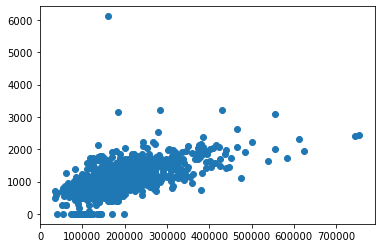

In [29]:
#Perform a simple visualization of one of the independent variables against the dependent variable "Saleprice"
plt.scatter(HouseTrain['SalePrice'], HouseTrain['TotalBsmtSF'])
plt.show()

# The significance shown below is of a strong positive correlation

In [7]:
#Assign a dependent variable in preparation for the machine learning model
y = HouseTrain['SalePrice']

In [30]:
#Assign the independent variables in preparation for the machine learning model
x = HouseTrain[['OverallQual','GrLivArea','GarageCars', 'TotalBsmtSF','1stFlrSF','KitchenAbvGr', 'EnclosedPorch' ]]

In [11]:
#Import the model
from sklearn.model_selection import train_test_split

In [12]:
#Split the train data into 70,30
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3)

In [13]:
#Import the linear regression model for this data insight. Note, linear regression is used for numeric insights generation
from sklearn.linear_model import LinearRegression

In [14]:
#Initialize the model
model = LinearRegression()

In [15]:
#Fit the model
model.fit(x_train, y_train)

LinearRegression()

In [16]:
#Get the model co-efficient values
print(model.coef_)

[ 2.26972949e+04  4.54321915e+01  1.89652051e+04  1.20781694e+01
  2.03193974e+01 -2.70800092e+04 -5.43958644e+01]


In [17]:
#Get the model intercept
print(model.intercept_)

-67116.67580706731


In [18]:
#Print the model co-efficient values in a table
pd.DataFrame(model.coef_, x.columns, columns = ['Coeff'])

,Coeff
OverallQual,22697.294872
GrLivArea,45.432191
GarageCars,18965.205112
TotalBsmtSF,12.078169
1stFlrSF,20.319397
KitchenAbvGr,-27080.009182
EnclosedPorch,-54.395864


In [21]:
#Here is a the mathematical model formed by the linear regression function for evaluation test values. 

y= -74724 + 23909[OverallQual] + 45[GrLivArea] + 17504[GarageCars]+ 16[TotalBsmtSF]+18[1stFlrSF]-26607[KitchenAbvGr]-46[EnclosedPorch]
print('-74724 + 23909[OverallQual] + 45[GrLivArea] + 17504[GarageCars]+ 16[TotalBsmtSF]+18[1stFlrSF]-26607[KitchenAbvGr]-46[EnclosedPorch]')

SyntaxError: invalid syntax (<ipython-input-21-d9436f67fcdb>, line 1)

In [122]:
#Fit the model to the data

#LogisticRegression(random_state=0).fit(x_train, y_train)
model.fit(x_train, y_train)

C:\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [23]:
# Returns a NumPy Array
# Predict for test data
predictions = model.predict(x_test)

In [24]:
#Chect the model accuracy
score = model.score(x_test, y_test)
print(score)

0.7960893017748774
